<a href="https://colab.research.google.com/github/JustineJa/OC_IMLP5/blob/main/IML_P5_Exploration_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projet 5 | xxx

Partie 1 | Analyse Exploratoire

### Présentation du projet
Je suis consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

NLP = Natural language processing

# Import des packages, fonctions et paramétrage initial

Notebook variables reset for each complete execution of this code :

In [1]:
%reset -f

## Vérification de la version de Python

In [2]:
!python -V

Python 3.10.12


## Import des packages utiles au projet

In [3]:
# Intall the contractions package - https://github.com/kootenpv/contractions
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.8 MB/s eta 0:00:00


In [4]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [5]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
!pip install sentencepiece &> /dev/null

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Modules classiques d'analyse exploratoire:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab
%matplotlib inline

# Manipulation fichiers et Interaction avec l'os / notebook
import os
import csv
import requests
import warnings

# Manipulations temporelles
from datetime import datetime
from datetime import date

# Feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

# Modelling
from sklearn.cluster import KMeans

# Libraries and packages for text (pre-)processing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.stem import PorterStemmer


import spacy
from spacy.lang.en.examples import sentences
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS

import tensorflow_hub as hub
import tensorflow as tf

#from keras.utils.vis_utils import plot_model

from wordcloud import WordCloud

import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary


#import tokenization

# Libraries and packages for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.metrics import multilabel_confusion_matrix, classification_report, jaccard_score, ConfusionMatrixDisplay

# Algo supervisés
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import LatentDirichletAllocation



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

Using matplotlib backend: <object object at 0x79dd87ec7670>
Populating the interactive namespace from numpy and matplotlib


Vérification des versions de package disponibles

---



In [9]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyascii                         0.3.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
bea

## Mise en page et réglages divers du notebook

In [10]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# Chargement et préparation des données

## Chargement des datasets

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Création des DataFrame
df_stack = pd.read_csv("/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/QueryResults.csv")
df_stack.head(1)

,Title,Body,Tags,CreationDate,AnswerCount,ViewCount,Score
0,Python kernel dies for second run of PyQt5 GUI,"<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n",<python><ipython><anaconda><pyqt5><spyder>,2016-10-17 19:21:55,3,10077,17


In [13]:
df_stack.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score'],
      dtype='object')

In [14]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35018 entries, 0 to 35017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         35018 non-null  object
 1   Body          35018 non-null  object
 2   Tags          35018 non-null  object
 3   CreationDate  35018 non-null  object
 4   AnswerCount   35018 non-null  int64 
 5   ViewCount     35018 non-null  int64 
 6   Score         35018 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


In [15]:
df_stack['Date'] = pd.to_datetime(df_stack['CreationDate'],
                                  format='%Y-%m-%d %H:%M:%S',
                                  errors = 'coerce')

In [16]:
df_stack.isnull().sum()

Title           0
Body            0
Tags            0
CreationDate    0
AnswerCount     0
ViewCount       0
Score           0
Date            0
dtype: int64

In [17]:
df = df_stack.copy()

# Exploration

## Univarié

In [18]:
CreationDateByDay = df['Date'].dt.date.value_counts()
df_date = CreationDateByDay.to_frame().reset_index()
df_date = df_date.reset_index()
df_date.head()

,index,Date,count
0,0,2014-03-13,47
1,1,2015-04-28,42
2,2,2014-01-28,41
3,3,2014-02-19,40
4,4,2014-04-16,40


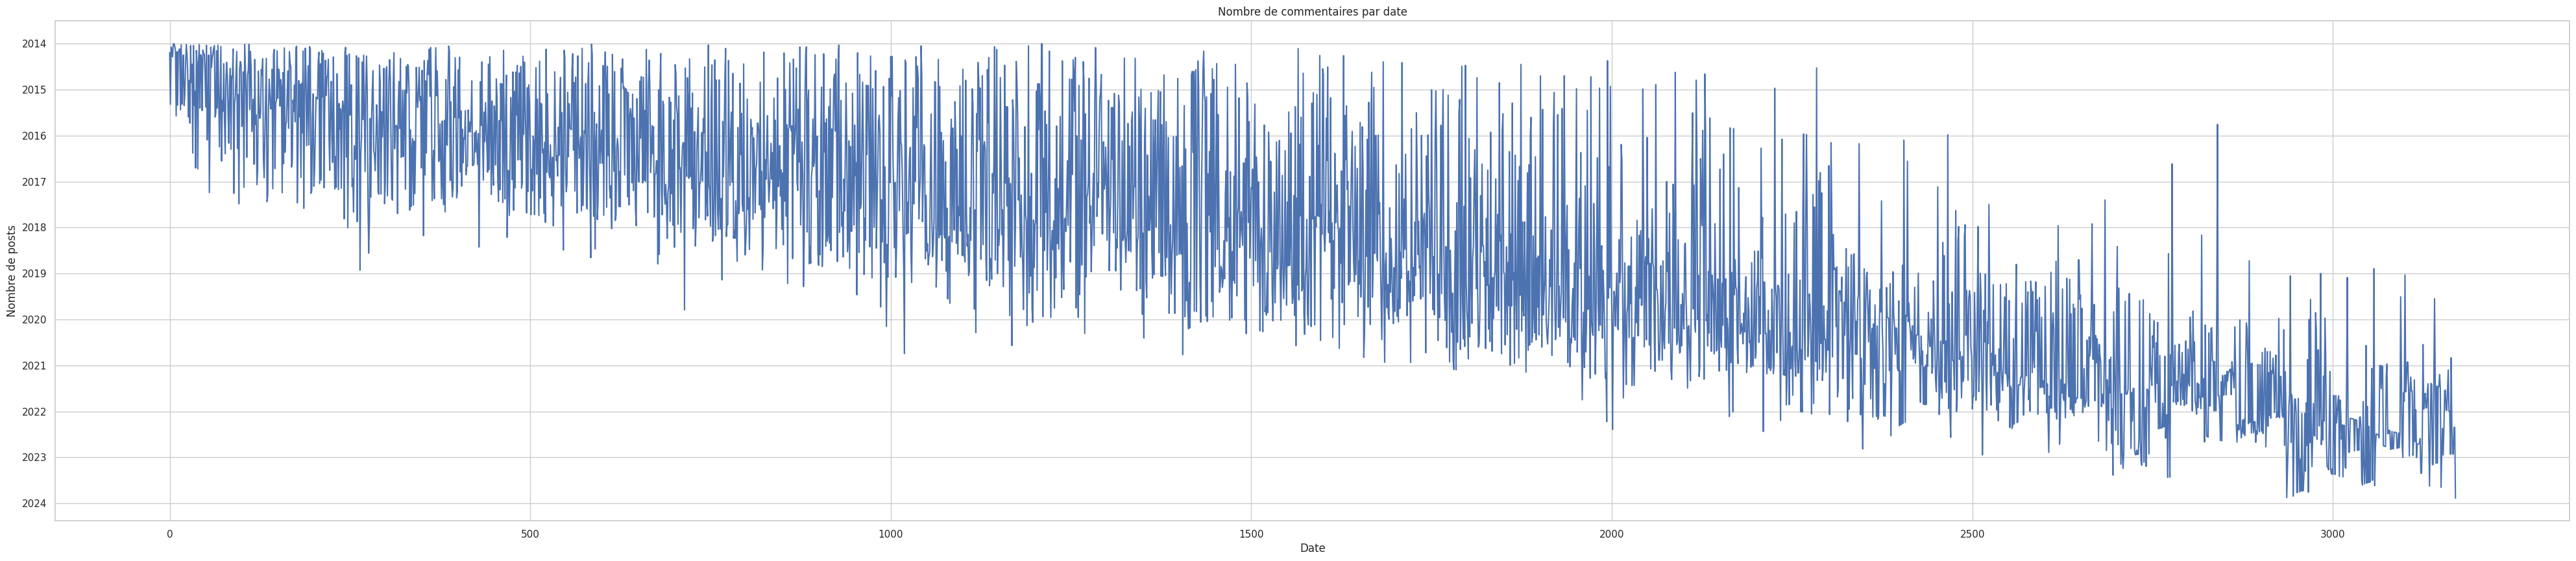

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
sns.lineplot(data=df_date, x=df_date['index'], y=df_date['Date'], ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

In [20]:
df.describe()

,AnswerCount,ViewCount,Score,Date
count,35018.000000,3.501800e+04,35018.000000,35018
mean,4.709892,5.442348e+04,40.647581,2016-11-30 00:56:02.586755584
min,1.000000,1.000100e+04,11.000000,2014-01-01 01:28:32
25%,2.000000,1.705425e+04,15.000000,2015-03-22 05:16:55
50%,3.000000,2.845300e+04,21.000000,2016-08-10 02:59:53
75%,6.000000,5.487400e+04,38.000000,2018-04-08 18:48:51.249999872
max,76.000000,3.486189e+06,5294.000000,2023-11-22 12:21:41
std,4.583556,9.482987e+04,83.174143,NaN


<Axes: xlabel='Score'>

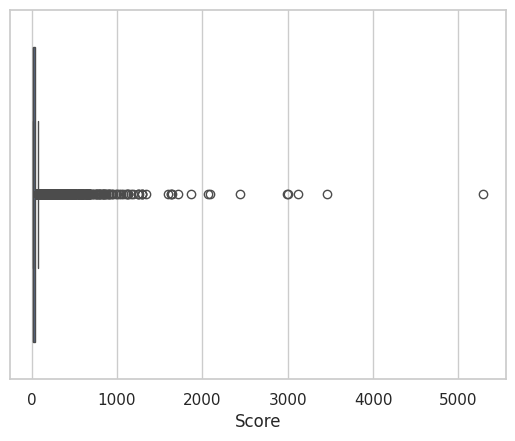

In [21]:
# Analyse du score
sns.boxplot(x=df["Score"])

<Axes: xlabel='AnswerCount'>

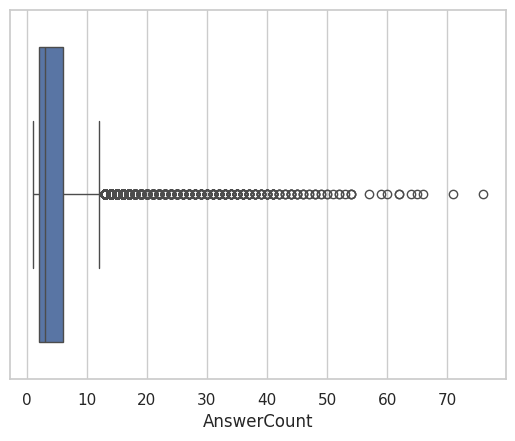

In [22]:
# Analyse du score
sns.boxplot(x=df["AnswerCount"])

<Axes: xlabel='ViewCount'>

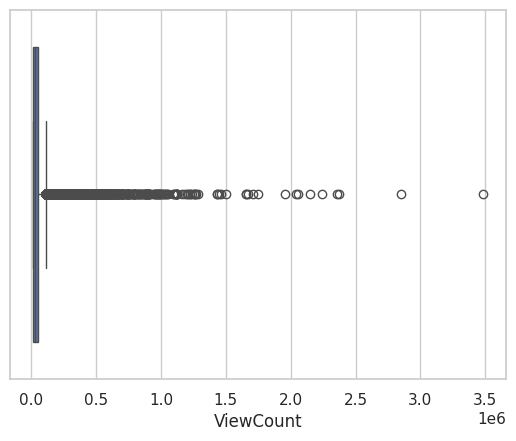

In [23]:
# Analyse du score
sns.boxplot(x=df["ViewCount"])

## Vues par ancienneté

In [24]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date'],
      dtype='object')

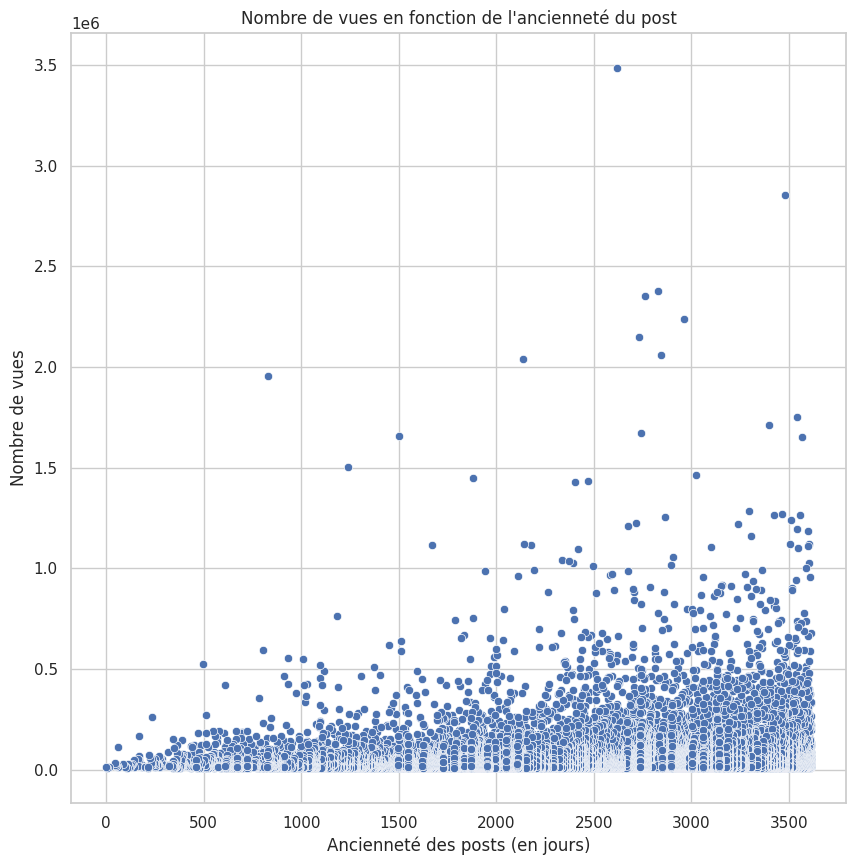

In [25]:
last_post = df["Date"].max()
df["CreationDateTimeDelta"] = last_post - df["Date"]
df["CreationDateTimeDelta"] = df["CreationDateTimeDelta"].dt.days

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.scatterplot(data=df, x="CreationDateTimeDelta", y="ViewCount", ax=ax)
ax.set_xlabel("Ancienneté des posts (en jours)")
ax.set_ylabel("Nombre de vues")
ax.set_title("Nombre de vues en fonction de l'ancienneté du post")
plt.show()

Plus le post est ancien, plus il a de vues.

## Corrélations

In [26]:
def correlations(data, methods):
    """
    Plot correlation matrix for quantitatives values.

    Args:
        data(dataframe): A dataframe

        method(string): CHosen method to compute correlation. Might be "pearson", "spearman" or "kendall"

    Returns:
        Correlation matrix
    """

    correlations = []
    cleanning_masks = []
    for method in methods:
        correlation = data.select_dtypes(include=['int64','float64']).corr(method=method) * 100
        cleanning_mask = np.zeros_like(correlation)
        upper_triangle = np.triu_indices_from(correlation)
        cleanning_mask[upper_triangle] = 1
        correlations.append(correlation)
        cleanning_masks.append(cleanning_mask)


    fig, axes = plt.subplots(nrows=len(methods), figsize=(30,40))
    fig.subplots_adjust(wspace=0.2)

    for i in range(len(axes)):
        sns.heatmap(correlations[i], ax=axes[i], cmap="RdBu_r", mask = cleanning_masks[i],
                   annot = True, fmt=".0f", cbar=False)

        axes[i].set_title(f"Matrice de corrélations de {methods[i]} en %")

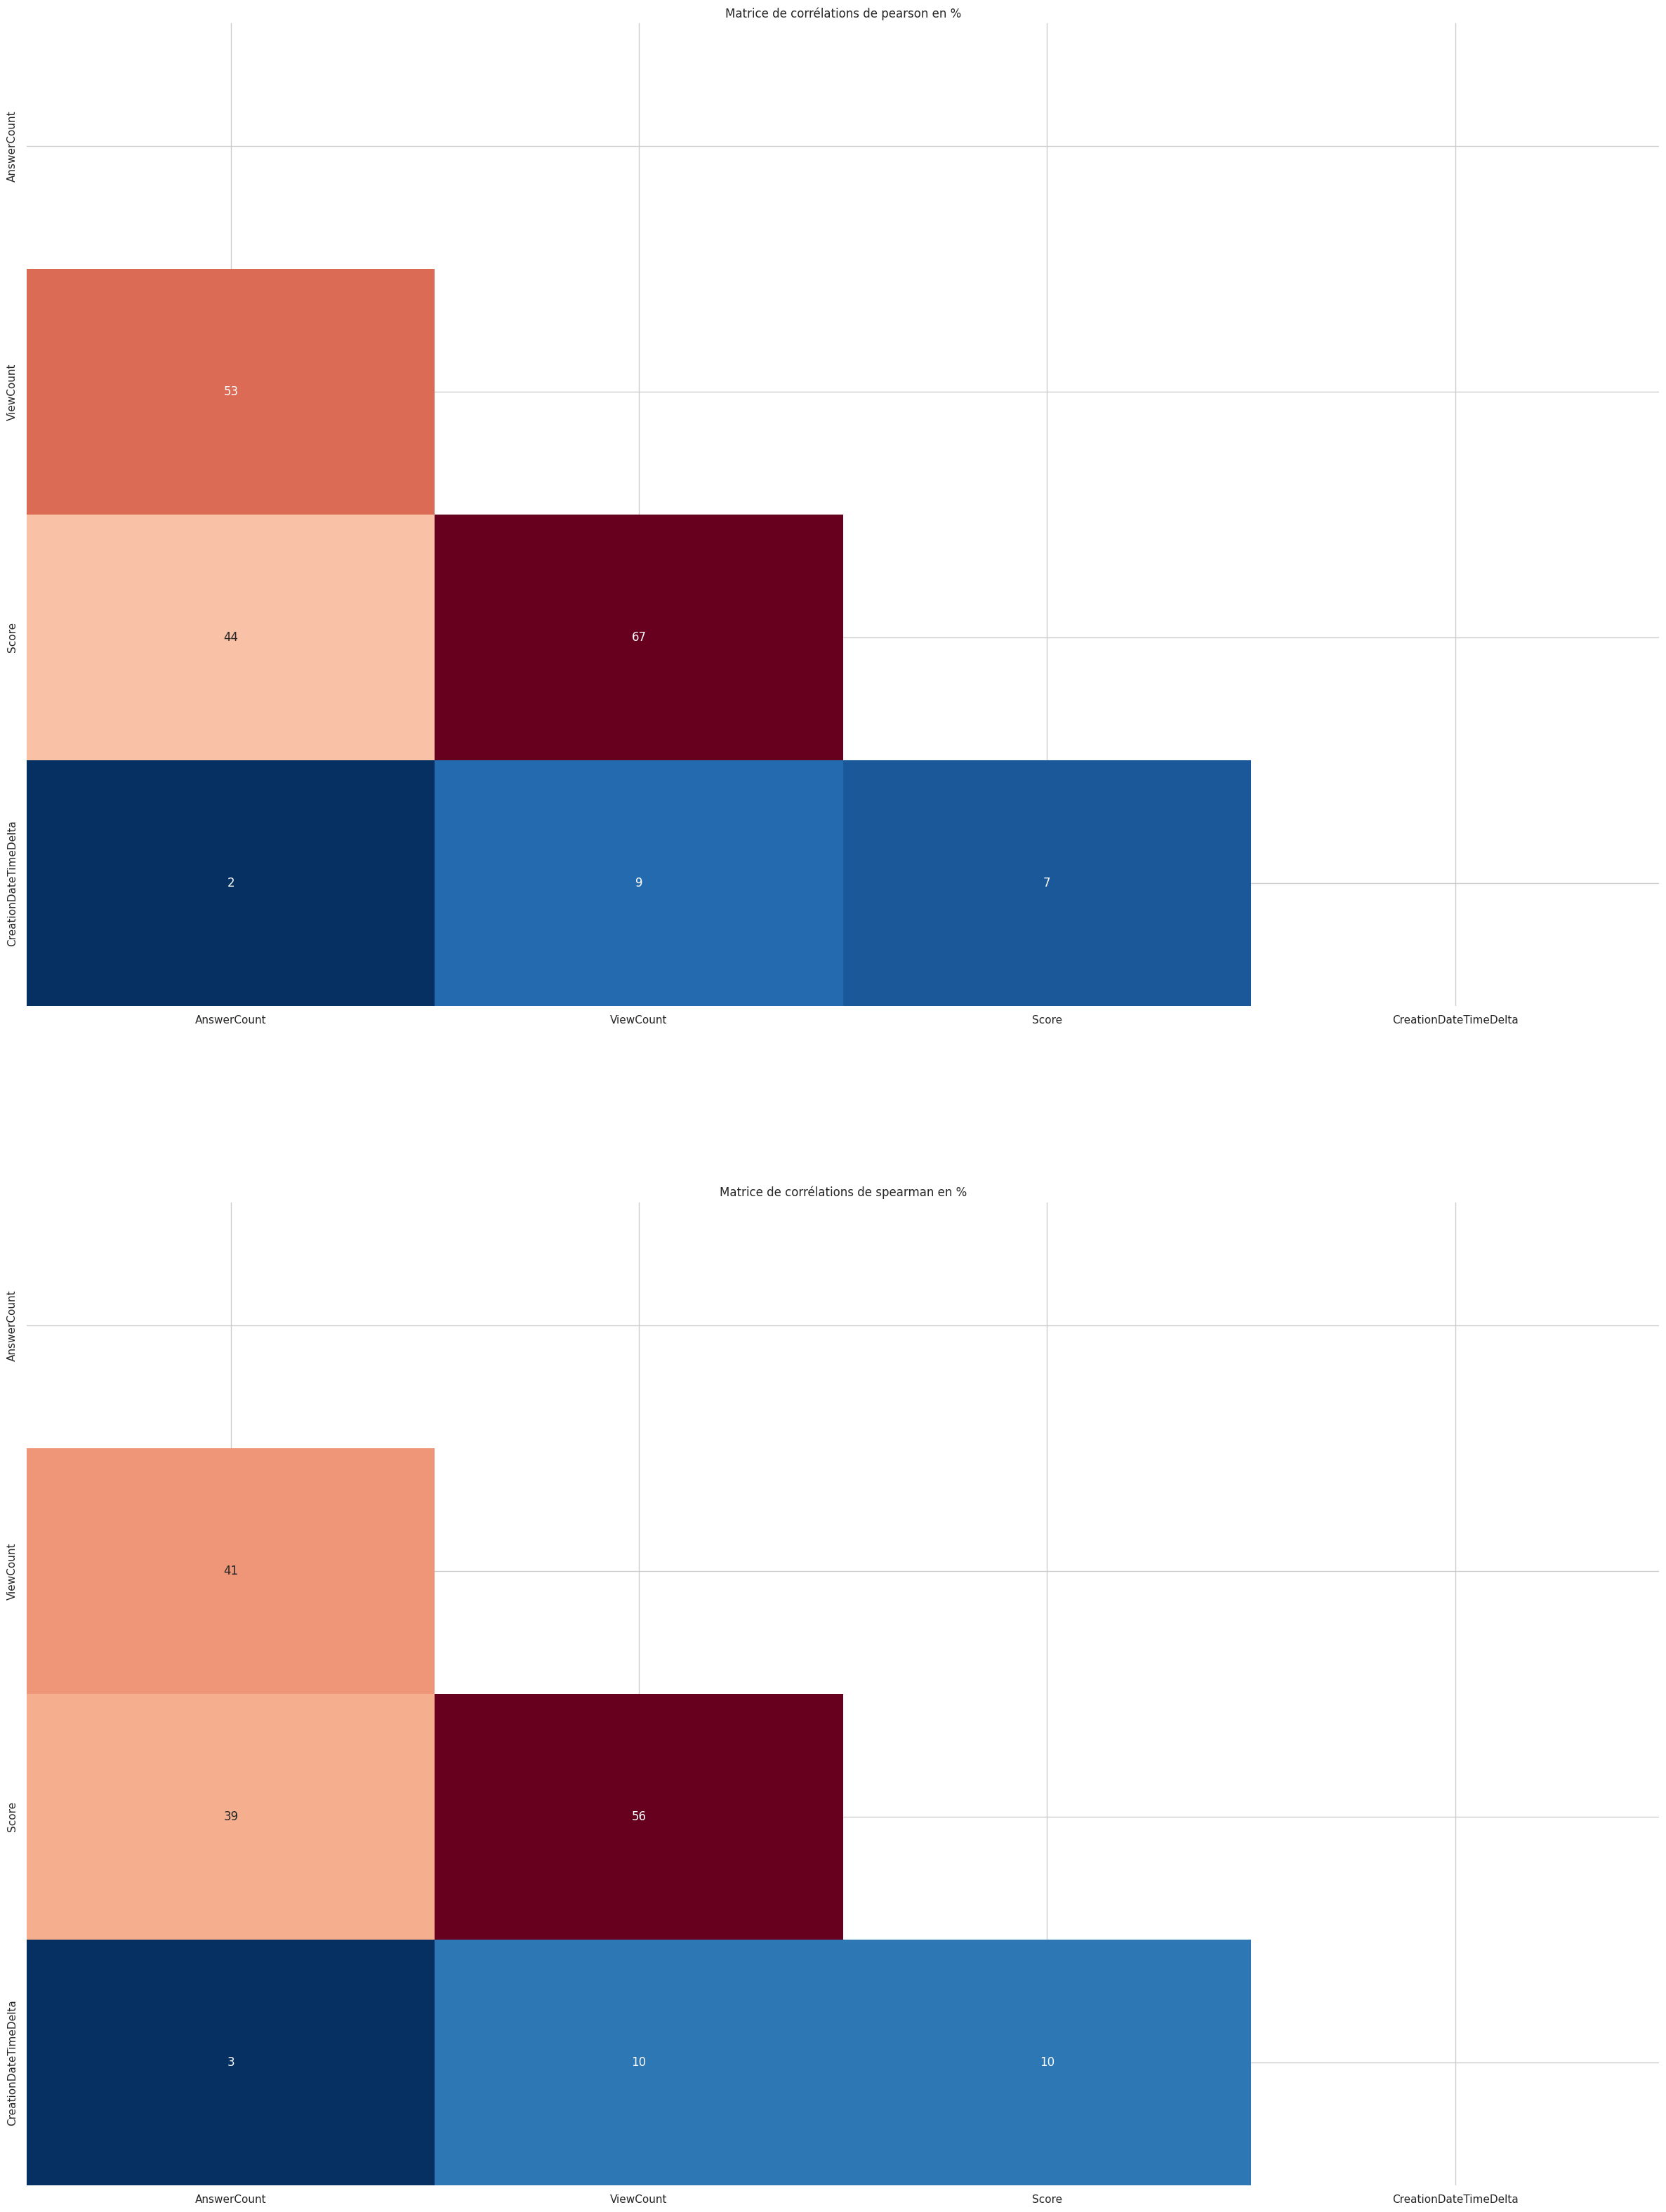

In [27]:
correlations(df,
             methods=["pearson", "spearman"])

# Requêtes

## Requête 1
- 50 questions
- période = 2023,
- contenant le tag “python”
- score > 50

In [28]:
df_req1 = df_stack[(df_stack['Score'].gt(50) &
                    (df_stack['Date'].gt(pd.Timestamp(2019,1,1)) & df_stack['Date'].lt(pd.Timestamp(2024,1,1))) &
                    df_stack["Tags"].str.contains("python"))].sample(50)
df_req1.head(1)

,Title,Body,Tags,CreationDate,AnswerCount,ViewCount,Score,Date
25996,flask_uploads: ImportError: cannot import name 'secure_filename',"<p>I want to create a form that allows to send a picture with a description using flask forms.\nI tried to use this video: <a href=""https://www.youtube.com/watch?v=Exf8RbgKmhM"" rel=""noreferrer"">https://www.youtube.com/watch?v=Exf8RbgKmhM</a></p>\n\n<p>but I had troubles when launching app.py:</p>\n\n<pre><code>➜ website git:(master) ✗ python3.6 app.py\nTraceback (most recent call last):\n File ""app.py"", line 10, in &lt;module&gt;\n from flask.ext.uploads import UploadSet, configure_uploads, IMAGES\nModuleNotFoundError: No module named 'flask.ext'\n</code></pre>\n\n<p>I had to replace\n<code>flask.ext.uploads</code> by <code>flask_uploads</code>\nbut now I get:</p>\n\n<pre><code>Traceback (most recent call last):\n File ""app.py"", line 10, in &lt;module&gt;\n from flask_uploads import UploadSet, configure_uploads, IMAGES\n File ""/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/flask_uploads.py"", line 26, in &lt;module&gt;\n from werkzeug import secure_filename, FileStorage\nImportError: cannot import name 'secure_filename'\n</code></pre>\n\n<p>My imports and config looks like this:</p>\n\n<pre><code>from datetime import datetime\nfrom flask_sqlalchemy import SQLAlchemy\nfrom flask import Flask, session, render_template, url_for, redirect, flash, request\nfrom wtforms import Form, fields,TextField, StringField, PasswordField, BooleanField,validators\nfrom wtforms.validators import InputRequired, Email, Length, DataRequired\nfrom flask_wtf import FlaskForm\nfrom flask_uploads import UploadSet, configure_uploads, IMAGES\nfrom flask_login import LoginManager, UserMixin, login_user, login_required, logout_user, current_user\n</code></pre>\n\n<p>I couldn't solve this issue, do you have any idea of what can I do ?</p>\n",<python><flask><python-3.6><flask-sqlalchemy><flask-uploads>,2020-05-06 06:10:37,6,86879,54,2020-05-06 06:10:37


# Txt cleaning

## Fonctions :

Fonctions définies:¶
- remove_html(text): en utilisant une méthode du module de scraping BeautifulSoup, on supprime les tags HTML présents dans le corps de texte

- separate_code(text): Sépare le code informatique du reste du texte dans le corps des questions. On utilise pour cela les expressions régulières pour isoler le contenu des tags code
- remove_code(text): une fois le code extrait et enregistré dans une nouvelle colonne du Data Frame, on utilise cette méthode pour le supprimer du corps de texte

- letters_only(text): fonction permettant de supprimer la ponctuation, les caractères spéciaux et les nombres du texte pour ne conserver que le texte brut
- tokenize_body(text): fonction permettant de "tokenizer" les questions afin de pouvoir appliquer le POS tagging, le stemming et le lemmatizing
- postag_body(text): POS tagging du texte tokenizé en vue de la lemmatization, on utilise ici la méthode de tagging du module NLTK
- wordnet_tag(tag): conversion des tags obtenus par le tagging NLTK en tags compatibles avec le Wordnet Lemmatizer
- lemm(text): lemmatisation du texte
- stem(text): stemming du texte
- remove_stopwords(text): fonction qui supprime les stopwords prédéfinis du texte
- code_strip(text): nettoyage des sections de code extraites du texte afin de ne conserver ici aussi que les caractères alphabétiques
- tag_clean(text): reformatage des tags afin de supprimer les caractères ">" et "<"
- body_join(text): réunion en une seule chaîne de caractères des listes de mots obtenues après tokenization

In [29]:
df['Text_complet'] = df['Title'] + df['Body']
df['Text_complet'].head(1)

0    Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquot

## Remove HTML tags

In [30]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [31]:
# remove html from the text
df['Text_cleaned'] = df['Text_complet'].apply(lambda x: remove_html(x))
df['Tags_cleaned'] = df['Tags']

In [32]:
df['Tags_cleaned'] = df['Tags_cleaned'].astype(str)
df['Tags_cleaned'] = df['Tags_cleaned'].replace({'<', '>'},' ')
df['Tags_cleaned'][0]

'<python><ipython><anaconda><pyqt5><spyder>'

In [33]:
df['Title_cleaned'] = df['Title'].apply(lambda x: remove_html(x))
df['Title_cleaned'][0]

'Python kernel dies for second run of PyQt5 GUI'

## Cleaning

In [34]:
%%time

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text.

    Args:
        text(String): Row text to clean

    Returns:
       res(string): Cleaned text
    """

    pattern = re.compile(r'[^\w]|[\d_]')

    try:
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text

    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res))
    res = " ".join(res)
    return res

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


In [35]:
df['Text_cleaned'] = [text_cleaning(text) for text in df['Text_cleaned']]
df['Tags_cleaned'] = [text_cleaning(text).strip() for text in df['Tags_cleaned']]

In [36]:
df['Tags_cleaned'][0]

'python ipython anaconda pyqt spyder'

In [37]:
df['Title_cleaned'] = [text_cleaning(text) for text in df['Title_cleaned']]
df['Title_cleaned'][0]

'python kernel dies second pyqt'

## Remove Non-ASCI

In [38]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable])

In [39]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_non_ascii(x))
df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_non_ascii(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_non_ascii(x))

In [40]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Remove special characters

In [41]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [42]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_special_characters(x))
df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_special_characters(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_special_characters(x))

In [43]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Remove punctuations

In [44]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [45]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_punct(x))
#df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_punct(x))

In [46]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [47]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_punct(x))
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Capitalization/ Lower case

In [48]:
df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: x.lower())
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: x.lower())

In [49]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [50]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: x.lower())
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Expand the Contractions

In [51]:
%%time
import contractions

# Test
test_text = """
            Y'all can't expand contractions I'd think. I'd like to know how I'd done that!
            We're going to the zoo and I don't think I'll be home for dinner.
            Theyre going to the zoo and she'll be home for dinner.
            We should've do it in here but we shouldn't've eat it
            """
print("Test: ", contractions.fix(test_text))

df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: contractions.fix(x))
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: contractions.fix(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: contractions.fix(x))

Test:  
            You all cannot expand contractions I would think. I would like to know how I would done that!
            We are going to the zoo and I do not think I will be home for dinner.
            They Are going to the zoo and she will be home for dinner.
            We should have do it in here but we should not have eat it
            
CPU times: user 4.04 s, sys: 18.4 ms, total: 4.06 s
Wall time: 4.84 s


In [52]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Noise Removal

In [53]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [54]:
# remove urls from the text
df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: remove_URL(x))
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_URL(x))

In [55]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [56]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_URL(x))
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Tokenisation

In [57]:
%%time
def tokenize(text):
    """
    Tokenize words of a text.

    Args:

        text(String): Row text

    Returns

        res(list): Tokenized string.
    """
    stop_words = set(stopwords.words('english'))
    #stop_words.extend([])

    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text

    res = [token for token in res if token not in stop_words]
    return res

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


In [58]:
df['tokenized_corpus'] = [tokenize(text) for text in df['Text_cleaned']]
df['tokenized_tags'] = [tokenize(text) for text in df["Tags_cleaned"]]

In [59]:
df['tokenized_tags'].head()

0                         [python, ipython, anaconda, pyqt, spyder]
1    [javascript, arrays, typescript, function, optional, chaining]
2                         [python, pandas, numpy, dataframe, types]
3                  [javascript, node, reactjs, typescript, webpack]
4                                     [swift, xcode, text, swiftui]
Name: tokenized_tags, dtype: object

In [60]:
df['Title_cleaned'] = [tokenize(text) for text in df['Title_cleaned']]
df['Title_cleaned'].head()

0       [python, kernel, dies, second, pyqt]
1    [optional, chaining, arrays, functions]
2    [apply, numeric, astype, float, python]
3                   [webpack, bundle, files]
4               [swiftui, tappable, subtext]
Name: Title_cleaned, dtype: object

## Lemmatisation

In [61]:
%%time
def lemmatization(tokens):
    """
    Transform tokens into lems

    Args:
        tokens(list): List of tokens

    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized = []

    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))

    return lemmatized

CPU times: user 0 ns, sys: 7 µs, total: 7 µs
Wall time: 10.7 µs


In [62]:
%%time
df['lemmatized_corpus'] = [lemmatization(tokens) for tokens in df['tokenized_corpus']]
df['lemmatized_tags'] = [lemmatization(tokens) for tokens in df['tokenized_tags']]

CPU times: user 20.6 s, sys: 149 ms, total: 20.7 s
Wall time: 23.5 s


In [63]:
df['Title_cleaned'] = [lemmatization(tokens) for tokens in df['Title_cleaned']]
df['Title_cleaned'].head()

0         [python, kernel, dy, second, pyqt]
1      [optional, chaining, array, function]
2    [apply, numeric, astype, float, python]
3                    [webpack, bundle, file]
4               [swiftui, tappable, subtext]
Name: Title_cleaned, dtype: object

In [64]:
df[['Text_cleaned', 'tokenized_corpus', 'lemmatized_corpus']].head(2)

,Text_cleaned,tokenized_corpus,lemmatized_corpus
0,python kernel dies second pyqt using spyder python anaconda windows package first window opens expected nothing opens receiving kernel died restarting message import from pyqt qtwidgets import qapplication qwidget qapplication argv qwidget resize show exit exec exec iphython runfile work python testproj wdir work python testproj runfile work python testproj wdir work python testproj kernel died restarting kernel died restarting kernel died restarting kernel dies solve doing same even using exit exec last line,"[python, kernel, dies, second, pyqt, using, spyder, python, anaconda, windows, package, first, window, opens, expected, nothing, opens, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dies, solve, even, using, exit, exec, last, line]","[python, kernel, dy, second, pyqt, using, spyder, python, anaconda, window, package, first, window, open, expected, nothing, open, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dy, solve, even, using, exit, exec, last, line]"
1,optional chaining with arrays functions trying optional chaining with array instead object sure that here what trying myarray filter testkey mytestkey also trying similar thing with function null console giving similar error optional chaining with array function,"[optional, chaining, arrays, functions, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[optional, chaining, array, function, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]"


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35018 entries, 0 to 35017
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  35018 non-null  object        
 1   Body                   35018 non-null  object        
 2   Tags                   35018 non-null  object        
 3   CreationDate           35018 non-null  object        
 4   AnswerCount            35018 non-null  int64         
 5   ViewCount              35018 non-null  int64         
 6   Score                  35018 non-null  int64         
 7   Date                   35018 non-null  datetime64[ns]
 8   CreationDateTimeDelta  35018 non-null  int64         
 9   Text_complet           35018 non-null  object        
 10  Text_cleaned           35018 non-null  object        
 11  Tags_cleaned           35018 non-null  object        
 12  Title_cleaned          35018 non-null  object        
 13  t

In [66]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date', 'CreationDateTimeDelta', 'Text_complet',
       'Text_cleaned', 'Tags_cleaned', 'Title_cleaned', 'tokenized_corpus',
       'tokenized_tags', 'lemmatized_corpus', 'lemmatized_tags'],
      dtype='object')

In [67]:
df[['Tags', 'Tags_cleaned', 'tokenized_tags', 'lemmatized_tags']].head(2)

,Tags,Tags_cleaned,tokenized_tags,lemmatized_tags
0,<python><ipython><anaconda><pyqt5><spyder>,python ipython anaconda pyqt spyder,"[python, ipython, anaconda, pyqt, spyder]","[python, ipython, anaconda, pyqt, spyder]"
1,<javascript><arrays><typescript><function><optional-chaining>,javascript arrays typescript function optional chaining,"[javascript, arrays, typescript, function, optional, chaining]","[javascript, array, typescript, function, optional, chaining]"


In [68]:
df['lemmatized_tags'] = df['lemmatized_tags'].replace({'<', '>'},'')

In [69]:
df[['Tags', 'Tags_cleaned', 'tokenized_tags', 'lemmatized_tags']].head(2)

,Tags,Tags_cleaned,tokenized_tags,lemmatized_tags
0,<python><ipython><anaconda><pyqt5><spyder>,python ipython anaconda pyqt spyder,"[python, ipython, anaconda, pyqt, spyder]","[python, ipython, anaconda, pyqt, spyder]"
1,<javascript><arrays><typescript><function><optional-chaining>,javascript arrays typescript function optional chaining,"[javascript, arrays, typescript, function, optional, chaining]","[javascript, array, typescript, function, optional, chaining]"


## Stemming

In [70]:
%%time
def stemming(tokens):
    """
    Transform tokens into lems

    Args:
        tokens(list): List of tokens

    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    stemming = PorterStemmer()
    stemmed = []

    for token in tokens:
        stemmed.append(stemming.stem(token))

    return stemmed

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [71]:
%%time
df['stemmed_corpus'] = [stemming(tokens) for tokens in df['lemmatized_corpus']]
df['stemmed_tags'] = [stemming(tokens) for tokens in df['lemmatized_tags']]

CPU times: user 1min 44s, sys: 484 ms, total: 1min 44s
Wall time: 1min 45s


In [72]:
df['Title_cleaned'] = [stemming(tokens) for tokens in df['Title_cleaned']]
df['Title_cleaned'].head()

0      [python, kernel, dy, second, pyqt]
1        [option, chain, array, function]
2    [appli, numer, astyp, float, python]
3                  [webpack, bundl, file]
4             [swiftui, tappabl, subtext]
Name: Title_cleaned, dtype: object

In [73]:
df['stemmed_corpus'].head()

0                                                                                                                                                                                                                                                       [python, kernel, dy, second, pyqt, use, spyder, python, anaconda, window, packag, first, window, open, expect, noth, open, receiv, kernel, die, restart, messag, import, pyqt, qtwidget, import, qapplic, qwidget, qapplic, argv, qwidget, resiz, show, exit, exec, exec, iphython, runfil, work, python, testproj, wdir, work, python, testproj, runfil, work, python, testproj, wdir, work, python, testproj, kernel, die, restart, kernel, die, restart, kernel, die, restart, kernel, dy, solv, even, use, exit, exec, last, line]
1                                                                                                                                                                                                                                        

In [74]:
df['stemmed_tags'].head()

0                   [python, ipython, anaconda, pyqt, spyder]
1    [javascript, array, typescript, function, option, chain]
2                      [python, panda, numpi, datafram, type]
3             [javascript, node, reactj, typescript, webpack]
4                               [swift, xcode, text, swiftui]
Name: stemmed_tags, dtype: object

## Jointure

In [75]:
def body_join(text):
    text=' '.join(text)
    return text

In [76]:
#df['Title_cleaned']=df['Title_cleaned'].apply(body_join)
#df['Title_cleaned'].head()

## Preproc final

In [77]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date', 'CreationDateTimeDelta', 'Text_complet',
       'Text_cleaned', 'Tags_cleaned', 'Title_cleaned', 'tokenized_corpus',
       'tokenized_tags', 'lemmatized_corpus', 'lemmatized_tags',
       'stemmed_corpus', 'stemmed_tags'],
      dtype='object')

In [78]:
print(f"Observations restante du corpus original: {df.shape[0]}")

joined_corpus = [" ".join(text) for text in df['lemmatized_corpus']]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_titles = [" ".join(tags) for tags in df['Title_cleaned']]
title_df = pd.DataFrame(joined_titles, columns=['preprocessed_titles'])
title_df['len_titles'] = title_df['preprocessed_titles'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in df['lemmatized_tags']]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, title_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[((corpus_tag_df['len_text']==0) | (corpus_tag_df['len_titles']==0) | (corpus_tag_df['len_tags']==0))].index

corpus_tag_df.drop(index=empty_data_idx, inplace=True)
df.drop(index=empty_data_idx, inplace=True)

print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")

corpus_tag_df['splitted_text'] = corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_title'] = corpus_tag_df['preprocessed_titles'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_tags'] = corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_title = corpus_tag_df['splitted_title'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = df['Text_complet'].to_list()

filtered_tokenized_vs_original = pd.concat([df['Text_complet'],
                                            corpus_tag_df['splitted_text'],
                                            corpus_tag_df['splitted_title'],
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)

#filtered_tokenized_vs_original.to_csv("./data/cleaned_corpus.csv", index=False)
#filtered_tokenized_vs_original.to_pickle('./data/cleaned_corpus.pkl')

Observations restante du corpus original: 35018
observations restantes du corpus traité: 34973


In [79]:
filtered_tokenized_vs_original.head(2)

,Text_complet,splitted_text,splitted_title,splitted_tags
0,"Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n","[python, kernel, dy, second, pyqt, using, spyder, python, anaconda, window, package, first, window, open, expected, nothing, open, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dy, solve, even, using, exit, exec, last, line]","[python, kernel, dy, second, pyqt]","[python, ipython, anaconda, pyqt, spyder]"
1,"How can I use optional chaining with arrays and functions?<p>I'm trying to use optional chaining with an array instead of an object but not sure how to do that:</p>\n<p>Here's what I'm trying to do <code>myArray.filter(x =&gt; x.testKey === myTestKey)?[0]</code>.\nAlso trying similar thing with a function:</p>\n<pre><code>let x = {a: () =&gt; {}, b: null}\nconsole.log(x?b());\n</code></pre>\n<p>But it's giving a similar error - how can I use optional chaining with an array or a function?</p>\n","[optional, chaining, array, function, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[option, chain, array, function]","[javascript, array, typescript, function, optional, chaining]"


# Analyse

In [80]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution

    Args:
        Corpus(List of lists): Original corpus

    Returns:

        word_dist_df(DataFrame): Word distribution of the corpus
    """
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11 µs


## Distribution dans le corpus

In [81]:
corpus = df['lemmatized_corpus'].to_list()

word_dist = build_word_distribution(corpus)

print(f"{word_dist.shape[0]} tokens différents dans le corpus")
print("10 tokens les plus utilisés :")
display(word_dist.head(10))

158870 tokens différents dans le corpus
10 tokens les plus utilisés :


,Frequency
Word,
java,37847
error,34702
file,34029
using,28554
class,27153
android,26790
name,24729
http,23093
user,22912


<class 'str'>


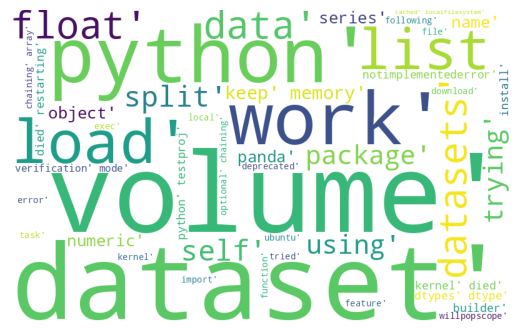

In [82]:
dataset_words=''.join(list(str(df['lemmatized_corpus'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Distribution des titres

In [83]:
titles = df['Title_cleaned'].to_list()

titles_dist = build_word_distribution(titles)

print(f"{titles_dist.shape[0]} 'mots' différents dans les titres")
print("20 mots les plus utilisés dans les titres :")
display(titles_dist.head(20))

11249 'mots' différents dans les titres
20 mots les plus utilisés dans les titres :


,Frequency
Word,
use,3056
error,2388
file,1997
python,1642
android,1470
spring,1328
test,1019
data,1015
work,979


In [84]:
titles_dist_df = pd.DataFrame(titles_dist)
titles_dist_df = titles_dist_df.reset_index()
titles_dist_df

,Word,Frequency
0,use,3056
1,error,2388
2,file,1997
3,python,1642
4,android,1470
...,...,...
11244,componentpublicinst,1
11245,swig,1
11246,dpiawar,1
11247,getmultilinemessag,1


In [85]:
vocabulary_title = titles_dist_df['Word']

In [86]:
vocabulary_title[:20]

0          use
1        error
2         file
3       python
4      android
5       spring
6         test
7         data
8         work
9        react
10        valu
11        type
12        java
13      object
14    function
15      instal
16       creat
17        fail
18      differ
19        json
Name: Word, dtype: object

In [87]:
dataset_words=''.join(list(str(df['Title_cleaned'].values)))
dataset_words

"[list(['python', 'kernel', 'dy', 'second', 'pyqt'])\n list(['option', 'chain', 'array', 'function'])\n list(['appli', 'numer', 'astyp', 'float', 'python']) ...\n list(['notimplementederror', 'load', 'dataset', 'cach', 'localfilesystem', 'support'])\n list(['unabl', 'locat', 'packag', 'dotnet'])\n list(['willpopscop', 'deprec', 'flutter'])]"

<class 'str'>


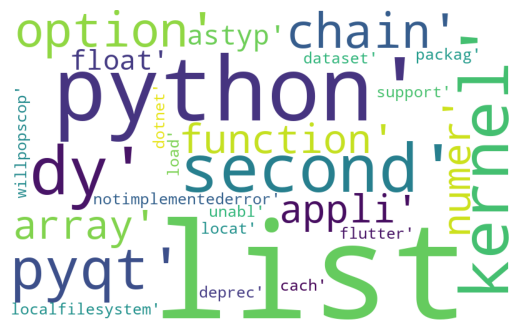

In [88]:
#dataset_words=''.join(list(str(df['Title_cleaned'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Distribution des tags

In [89]:
tags = df['lemmatized_tags'].to_list()

tag_dist = build_word_distribution(tags)

print(f"{tag_dist.shape[0]} tags différents")
print("10 tags les plus utilisés :")
display(tag_dist.head(10))

7573 tags différents
10 tags les plus utilisés :


,Frequency
Word,
python,7927
android,7149
java,5038
javascript,4809
spring,4119
node,2024
core,1969
angular,1901
google,1854


In [90]:
tag_dist.describe()

,Frequency
count,7573.000000
mean,25.485013
std,183.240485
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,7927.000000


75% des tags sont utilisés moins de 8 fois. </br>
Seuls 25% des tags (soit 1893 tags) sont utilisés plus de 8 fois. </br>
Gardons les 5% des tags les plus utilisés soit ~ 400 tags

<class 'str'>


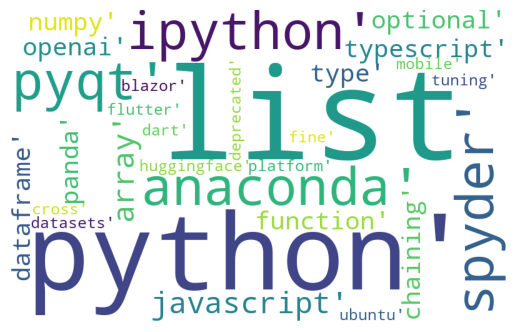

In [91]:
dataset_words=''.join(list(str(df['lemmatized_tags'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [92]:
m = 50
first_m_tags = tag_dist[0:m].index.to_list()

In [93]:
len(first_m_tags)

50

In [94]:
print(f"Nombre de posts dans fichier de base: {df.shape[0]}")

filtered_df = df.copy()
filtered_df['tags_in_top_m'] = filtered_df['lemmatized_tags'].apply(lambda tags: [tag for tag in tags if tag in first_m_tags])

filtered_df['len_tags_in_top_m'] = filtered_df['tags_in_top_m'].apply(lambda x: len(x))
missing_filtered_data = filtered_df[filtered_df['len_tags_in_top_m'] == 0].index

filtered_df.drop(index=missing_filtered_data, inplace=True)
df.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {filtered_df.shape[0]}")

top_m_corpus = filtered_df['lemmatized_corpus'].to_list()
top_m_joined_corpus = filtered_df['lemmatized_corpus'].to_list()
top_m_tags = filtered_df['tags_in_top_m'].to_list()

Nombre de posts dans fichier de base: 34973
Observations restantes dans le coprus traité: 29995


# Export

In [95]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date', 'CreationDateTimeDelta', 'Text_complet',
       'Text_cleaned', 'Tags_cleaned', 'Title_cleaned', 'tokenized_corpus',
       'tokenized_tags', 'lemmatized_corpus', 'lemmatized_tags',
       'stemmed_corpus', 'stemmed_tags'],
      dtype='object')

In [96]:
# Sélection des features à exporter
df_cleaned = df[['Title', 'Body', 'Tags','lemmatized_corpus', 'lemmatized_tags',
       'stemmed_corpus', 'stemmed_tags']].copy()

In [97]:
df_cleaned.to_csv('/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_cleaned.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

# Preprocessing

In [ ]:
vocabulary = list(word_dist[word_dist["Frequency"]>=1000].index)
len(vocabulary)

725

In [ ]:
corpus = df['lemmatized_corpus'].apply(lambda x: ' '.join(x))

## Bag of words
CountVectorizer

In [ ]:
vectorizer = CountVectorizer(vocabulary=vocabulary)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['java', 'error', 'file', 'using', 'class', 'android', 'name',
       'http', 'user', 'data', 'code', 'return', 'test', 'public',
       'import', 'string', 'version', 'like', 'type', 'value', 'function',
       'module', 'python', 'build', 'work', 'project', 'true', 'server',
       'method', 'want', 'package', 'request', 'application', 'self',
       'object', 'line', 'node', 'following', 'json', 'image', 'would',
       'model', 'service', 'core', 'springframework', 'tried', 'text',
       'path', 'time', 'trying', 'example', 'view', 'need', 'spring',
       'system', 'problem', 'create', 'main', 'react', 'dependency',
       'found', 'result', 'also', 'client', 'html', 'apache', 'message',
       'find', 'content', 'private', 'null', 'component', 'default',
       'option', 'script', 'gradle', 'library', 'call', 'false', 'item',
       'make', 'command', 'internal', 'void', 'list', 'know', 'install',
       'window', 'support', 'response', 'context', 'info', 'could',
       '

In [ ]:
bag_of_words_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de Bag of words")
display(bag_of_words_data.sample(10))
print(f" Nombre d'observations: {bag_of_words_data.shape[0]}, nombre de variables: {bag_of_words_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de Bag of words


,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
4697,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4264,0,1,0,1,0,0,0,0,0,3,1,1,0,0,0,4,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,1,0,0,0,9,0,0,3,8,2,0,3,0,12,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4469,0,3,0,0,0,0,0,0,2,0,3,1,2,0,0,1,0,1,0,0,0,0,0,0,3,4,0,1,1,0,0,0,0,0,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
27352,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25055,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

 Nombre d'observations: 29995, nombre de variables: 725


In [ ]:
bag_of_words_data.describe()

,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000

## TF-IDF

### Vectorisation

In [ ]:
%%time
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

CPU times: user 4.1 s, sys: 106 ms, total: 4.2 s
Wall time: 4.39 s


In [ ]:
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.sample(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
14473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05345,0.059555,0.000000,0.045582,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.298815,0.0,0.0,0.000000,0.051556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059673,0.064099,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.072501,0.0,0.0,0.000000,0.000000,0.000000,0.077147,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.152344,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.076868,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.341554,0.0,0.0,0.0,0.0,0.0,0.0
22814,0.030055,0.000000,0.000000,0.016384,0.022487,0.031420,0.000000,0.00000,0.125566,0.000000,0.038442,0.045562,0.053609,0.110271,0.000000,0.205036,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.056407,0.021740,0.000000,0.026043,0.000000,0.026113,0.000000,0.000000,0.059444,0.026037,0.035847,0.0,0.0,0.0,0.023186,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.193141,0.000000,0.027030,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.066101,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.029669,0.0,0.0,0.00000,0.0,0.0,0.032482,0.0,0.026287,0.000000,0.000000,0.000000,0.067106,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.042274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195093,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7206,0.000000,0.019382,0.109130,0.000000,0.000000,0.160630,0.000000,0.00000,0.025677,0.000000,0.019653,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.022229,0.000000,0.000000,0.000000,0.000000,

 Nombre d'observations: 29995, nombre de variables: 725


In [ ]:
tfidf_data.describe()

,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000

In [ ]:
df.shape

(29995, 19)

In [ ]:
tfidf_data.shape


(29995, 725)

In [ ]:
df_tfidf = pd.concat([df, tfidf_data], axis = 1)

In [ ]:
df_tfidf.shape

(34432, 744)

In [ ]:
df_tfidf = df_tfidf.dropna(subset=['Title'])

In [ ]:
df_tfidf.shape

(29995, 744)

In [ ]:
df_tfidf.head()

Title  \
0                          Python kernel dies for second run of PyQt5 GUI   
1              How can I use optional chaining with arrays and functions?   
2  When to apply(pd.to_numeric) and when to astype(np.float64) in python?   
3                                         Get Webpack not to bundle files   
4                                                SwiftUI tappable subtext   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_tfidf = tsne.fit_transform(tfidf_data)
tsne_tfidf

array([[ 14.358337 ,  36.811188 ],
       [-31.10263  , -39.875744 ],
       [-41.718063 , -37.37654  ],
       ...,
       [  0.6461211,  35.117584 ],
       [-42.40177  , -61.584164 ],
       [ 77.93918  ,  13.8850975]], dtype=float32)

In [ ]:
df_tsne_tfidf = pd.DataFrame(tsne_tfidf, columns=['Dim0', 'Dim1'])
df_tsne_tfidf.to_csv('/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_tsne_tfidf.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

In [ ]:
# Création des DataFrame
df_tsne_tfidf = pd.read_csv("/content/drive/MyDrive/2_Formations/2.0_OpenClassRooms/2.0.0_IML/IML P5/5.1_Data/df_tsne_tfidf.csv",
                            sep=';')
df_tsne_tfidf.head(1)

,Dim0,Dim1
0,14.358337,36.811188


<Axes: xlabel='Dim0', ylabel='Dim1'>

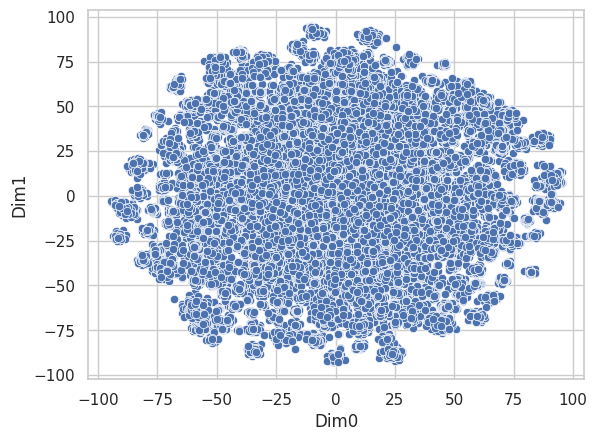

In [ ]:
sns.scatterplot(data=df_tsne_tfidf,
                x="Dim0",
                y="Dim1",
                )

In [ ]:
df_tot_tfidf = pd.concat([df_tfidf, df_tsne_tfidf], axis = 1)

In [ ]:
outlier = df_tot_tfidf[df_tot_tfidf["Dim1"].lt(-1000)]
outlier

,Title,Body,Tags,CreationDate,AnswerCount,ViewCount,Score,Date,CreationDateTimeDelta,Text_complet,Text_cleaned,Tags_cleaned,Title_cleaned,tokenized_corpus,tokenized_tags,lemmatized_corpus,lemmatized_tags,stemmed_corpus,stemmed_tags,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,...,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent,Dim0,Dim1


# Approche non supervisée

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

## NMF

In [ ]:
from sklearn.decomposition import NMF
no_topics = 40
# Run NMF
nmf = NMF(n_components=no_topics,
          random_state=1,
          #alpha=.1,
          l1_ratio=.5,
          #init='nndsvd'
          )
nmf.fit(X)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
like would using want know time example need question something
Topic 1:
android layout support studio parent activity match device intent widget
Topic 2:
python package install line site local version anaconda installed command
Topic 3:
java apache lang springframework internal util invoke reflect catalina junit
Topic 4:
column dataframe panda index spark row plot frame list want
Topic 5:
react component native const prop render state router jest route
Topic 6:
text input label form font type string field title line
Topic 7:
public string private void return override null entity static method
Topic 8:
request response header http post content body origin control allow
Topic 9:
file path line upload folder directory read download open filename
Topic 10:
image size background width height base asset upload path convert
Topic 11:
test unit mock jest testing junit train expect setup method
Topic 12:
user password email username login role auth authentication admin permission
Topi

## LDA model sur le corpus (titre + body)
LDA :
- https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc
- https://github.com/kapadias/medium-articles/blob/master/natural-language-processing/topic-modeling/Evaluate%20Topic%20Models.ipynb

### Process

In [ ]:
id2word = gensim.corpora.Dictionary(df['lemmatized_corpus'])
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=80000)

BoW_corpus = [id2word.doc2bow(text) for text in df['lemmatized_corpus']]
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')
transformed_tfidf = tfidf[BoW_corpus]

In [ ]:
%%time
models=[]
coherence_value = []
best_nb = 0
best_coherence = 0
limit=13
start=6
step=1
for topic_number in range(start,limit,step):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=transformed_tfidf,
                                           id2word=id2word,
                                            num_topics=topic_number,
                                              random_state = 42)
  models.append(lda_model)
  coherence_model_lda = CoherenceModel(model=lda_model,
                                       texts=df['lemmatized_corpus'].to_list(),
                                       dictionary=id2word,
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_value.append(coherence_lda)
  print(f"Pour {topic_number} topics, la cohérence est de {round(coherence_lda,3)}")

  if best_coherence < coherence_lda:
    best_nb = topic_number
    best_coherence = coherence_lda


Pour 6 topics, la cohérence est de 0.47
Pour 7 topics, la cohérence est de 0.511
Pour 8 topics, la cohérence est de 0.57
Pour 9 topics, la cohérence est de 0.581
Pour 10 topics, la cohérence est de 0.53
Pour 11 topics, la cohérence est de 0.555
Pour 12 topics, la cohérence est de 0.531
CPU times: user 6min 30s, sys: 1.91 s, total: 6min 32s
Wall time: 6min 36s


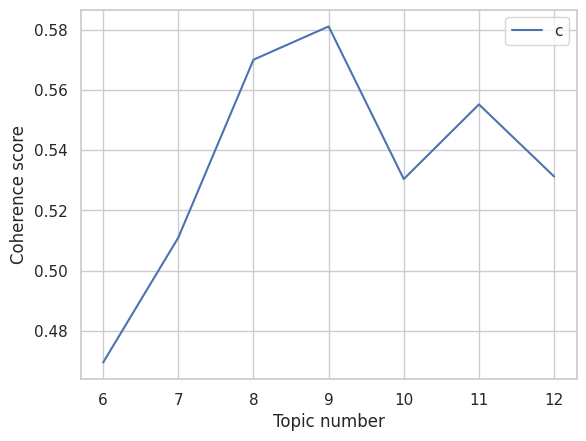

Topic number = 6  has Coherence Value of 0.4695
Topic number = 7  has Coherence Value of 0.511
Topic number = 8  has Coherence Value of 0.57
Topic number = 9  has Coherence Value of 0.581
Topic number = 10  has Coherence Value of 0.5304
Topic number = 11  has Coherence Value of 0.5552
Topic number = 12  has Coherence Value of 0.5312


In [ ]:
x = range(start, limit, step)
plt.plot(x, coherence_value)
plt.xlabel("Topic number")
plt.ylabel("Coherence score")
plt.legend(("coherence_value"), loc='best')
plt.show()

for m, cv in zip(x, coherence_value):
    print("Topic number =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
%%time
from pprint import pprint
optimal_model = models[1]

print('\nPerplexity: ', optimal_model.log_perplexity(transformed_tfidf))

coherence_model_lda = CoherenceModel(model=optimal_model, texts=df['lemmatized_corpus'].to_list(), dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))


Perplexity:  -8.849177981945434

Coherence Score:  0.5109795828350123
[(0,
  '0.014*"java" + 0.012*"spring" + 0.009*"public" + 0.008*"boot" + '
  '0.007*"springframework" + 0.007*"class" + 0.006*"model" + '
  '0.005*"dependency" + 0.005*"test" + 0.005*"bean" + 0.004*"maven" + '
  '0.004*"hibernate" + 0.004*"apache" + 0.004*"string" + 0.004*"train" + '
  '0.004*"layer" + 0.004*"private" + 0.003*"annotation" + 0.003*"entity" + '
  '0.003*"kera" + 0.003*"method" + 0.003*"void" + 0.003*"exception" + '
  '0.003*"version" + 0.003*"property" + 0.003*"swagger" + '
  '0.003*"configuration" + 0.003*"artifactid" + 0.003*"return" + '
  '0.003*"junit"'),
 (1,
  '0.006*"react" + 0.005*"data" + 0.005*"value" + 0.005*"import" + '
  '0.005*"array" + 0.005*"component" + 0.005*"column" + 0.005*"function" + '
  '0.004*"module" + 0.004*"string" + 0.004*"test" + 0.004*"type" + '
  '0.004*"name" + 0.004*"file" + 0.004*"dataframe" + 0.004*"object" + '
  '0.004*"date" + 0.004*"json" + 0.004*"const" + 0.004*"l

In [ ]:
topic_number = best_nb
lda_model = gensim.models.ldamodel.LdaModel(corpus=transformed_tfidf,
                                           id2word=id2word,
                                            num_topics=topic_number)
lda_model.show_topics(topic_number)

[(0,
  '0.011*"react" + 0.010*"android" + 0.008*"component" + 0.006*"module" + 0.006*"color" + 0.006*"view" + 0.005*"button" + 0.005*"layout" + 0.005*"node" + 0.005*"import"'),
 (1,
  '0.008*"request" + 0.006*"json" + 0.006*"user" + 0.006*"response" + 0.006*"function" + 0.006*"data" + 0.005*"return" + 0.005*"post" + 0.005*"token" + 0.005*"http"'),
 (2,
  '0.006*"column" + 0.006*"dataframe" + 0.005*"array" + 0.005*"python" + 0.005*"data" + 0.005*"model" + 0.005*"file" + 0.005*"self" + 0.004*"value" + 0.004*"panda"'),
 (3,
  '0.010*"certificate" + 0.008*"fragment" + 0.008*"server" + 0.007*"docker" + 0.007*"client" + 0.007*"port" + 0.007*"proxy" + 0.006*"connection" + 0.006*"mysql" + 0.006*"connect"'),
 (4,
  '0.013*"python" + 0.009*"install" + 0.007*"package" + 0.006*"file" + 0.006*"docker" + 0.005*"module" + 0.005*"command" + 0.005*"window" + 0.005*"line" + 0.005*"node"'),
 (5,
  '0.017*"java" + 0.012*"android" + 0.010*"gradle" + 0.009*"build" + 0.009*"project" + 0.008*"version" + 0.008

In [ ]:
doc_lda = lda_model[transformed_tfidf]
doc_lda

In [ ]:
get_document_topics = lda_model.get_document_topics(transformed_tfidf)
print(get_document_topics[0])

[(0, 0.0368592), (1, 0.022375457), (2, 0.022377582), (3, 0.022372982), (4, 0.6194517), (5, 0.20929159), (6, 0.022372933), (7, 0.022371577), (8, 0.022527)]


In [ ]:
topics = lda_model.print_topics(num_topics=10, num_words=10)
topics

[(0,
  '0.011*"react" + 0.010*"android" + 0.008*"component" + 0.006*"module" + 0.006*"color" + 0.006*"view" + 0.005*"button" + 0.005*"layout" + 0.005*"node" + 0.005*"import"'),
 (1,
  '0.008*"request" + 0.006*"json" + 0.006*"user" + 0.006*"response" + 0.006*"function" + 0.006*"data" + 0.005*"return" + 0.005*"post" + 0.005*"token" + 0.005*"http"'),
 (2,
  '0.006*"column" + 0.006*"dataframe" + 0.005*"array" + 0.005*"python" + 0.005*"data" + 0.005*"model" + 0.005*"file" + 0.005*"self" + 0.004*"value" + 0.004*"panda"'),
 (3,
  '0.010*"certificate" + 0.008*"fragment" + 0.008*"server" + 0.007*"docker" + 0.007*"client" + 0.007*"port" + 0.007*"proxy" + 0.006*"connection" + 0.006*"mysql" + 0.006*"connect"'),
 (4,
  '0.013*"python" + 0.009*"install" + 0.007*"package" + 0.006*"file" + 0.006*"docker" + 0.005*"module" + 0.005*"command" + 0.005*"window" + 0.005*"line" + 0.005*"node"'),
 (5,
  '0.017*"java" + 0.012*"android" + 0.010*"gradle" + 0.009*"build" + 0.009*"project" + 0.008*"version" + 0.008

In [ ]:
%%time
doc =lda_model.get_document_topics(transformed_tfidf)
data = pd.DataFrame()

def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

data['doc_topic'] = [get_max(doc) for doc in lda_model.get_document_topics(transformed_tfidf)]

CPU times: user 13.6 s, sys: 149 ms, total: 13.7 s
Wall time: 13.8 s


In [ ]:
data['doc_topic'].value_counts()

doc_topic
1    6998
2    6436
0    5593
5    3588
4    3416
7    1421
3    1247
8     842
6     454
Name: count, dtype: int64

In [ ]:
print(topics)

[(0, '0.011*"react" + 0.010*"android" + 0.008*"component" + 0.006*"module" + 0.006*"color" + 0.006*"view" + 0.005*"button" + 0.005*"layout" + 0.005*"node" + 0.005*"import"'), (1, '0.008*"request" + 0.006*"json" + 0.006*"user" + 0.006*"response" + 0.006*"function" + 0.006*"data" + 0.005*"return" + 0.005*"post" + 0.005*"token" + 0.005*"http"'), (2, '0.006*"column" + 0.006*"dataframe" + 0.005*"array" + 0.005*"python" + 0.005*"data" + 0.005*"model" + 0.005*"file" + 0.005*"self" + 0.004*"value" + 0.004*"panda"'), (3, '0.010*"certificate" + 0.008*"fragment" + 0.008*"server" + 0.007*"docker" + 0.007*"client" + 0.007*"port" + 0.007*"proxy" + 0.006*"connection" + 0.006*"mysql" + 0.006*"connect"'), (4, '0.013*"python" + 0.009*"install" + 0.007*"package" + 0.006*"file" + 0.006*"docker" + 0.005*"module" + 0.005*"command" + 0.005*"window" + 0.005*"line" + 0.005*"node"'), (5, '0.017*"java" + 0.012*"android" + 0.010*"gradle" + 0.009*"build" + 0.009*"project" + 0.008*"version" + 0.008*"dependency" + 0

In [ ]:
topics_df = pd.DataFrame(lda_model.show_topic(2))
topics_df

,0,1
0,column,0.006120
1,dataframe,0.005586
2,array,0.005461
3,python,0.005252
4,data,0.005213
5,model,0.004661
6,file,0.004547
7,self,0.004525
8,value,0.004391
9,panda,0.004277


### Visualisation 2D

In [ ]:
tsne = df_tsne_tfidf
topics = data['doc_topic']

In [ ]:
df_viz = pd.concat([tsne, topics], axis=1)

In [ ]:
df_viz_2 = df_viz[df_viz["Dim1"].gt(-1000)]

<Axes: xlabel='Dim0', ylabel='Dim1'>

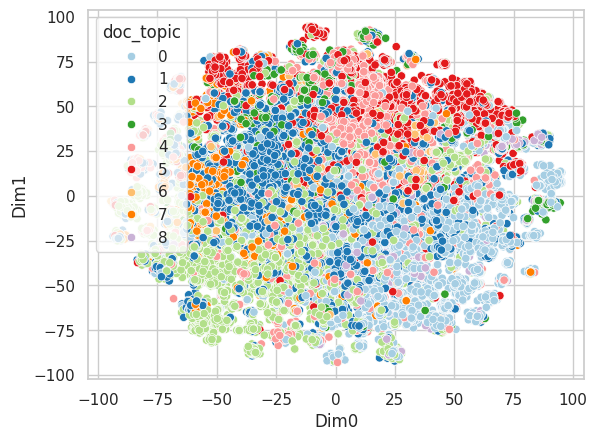

In [ ]:
sns.scatterplot(data=df_viz_2,
                x="Dim0",
                y="Dim1",
                hue='doc_topic',
                palette="Paired")

# Approche supervisée

In [ ]:
col_to_drop = []
X = tfidf_data.copy().drop(columns = col_to_drop)
y = df['stemmed_tags']

## Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
nb_dim = tfidf_data.shape[1]
print(f"Le passage au Tf-Idf a généré {nb_dim} dimensions, il nous faut les réduire")

Le passage au Tf-Idf a généré 725 dimensions, il nous faut les réduire


## Avec Pipeline

In [ ]:
# ML pipeline
categorical_encoder = OneHotEncoder(handle_unknown = 'ignore')
numerical_pipe = Pipeline([
#    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessing = ColumnTransformer(
    [
#        ('cat', categorical_encoder, categorical_feature.columns),
     ('num', numerical_pipe, numerical_features.columns)
     ])

rf = Pipeline([
    ('preproces', preprocessing),
    ('Classifier', RandomForestRegressor(random_state=42))
])

In [ ]:
var = 0.60

pipe = Pipeline([('scaler', StandardScaler()),
 ('pca', PCA(n_components=var, random_state=42)),
 ('Classifier', RandomForestClassifier(random_state=42))])
pipe.fit(X_train,y_train)

## Réduction de dimension - ACP

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

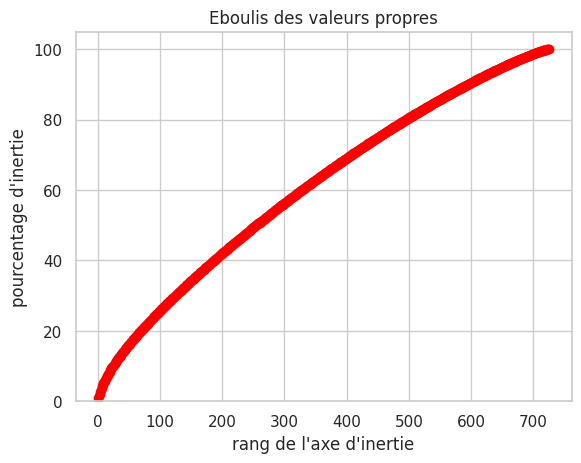

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

In [ ]:
var = 0.60

pca = PCA(n_components=var, random_state=42)
pca.fit(X_train_scaled)
X_train_transformed = pca.transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)
print(f"Nombre de composantes principales avec {var*100}% de la variance expliquée : {pca.components_.shape[0]}")
print(f"Nous avons gardé {round((pca.components_.shape[0]/nb_dim)*100,0)}% des dimensions")

Nombre de composantes principales avec 60.0% de la variance expliquée : 328
Nous avons gardé 45.0% des dimensions


## Vectorisation des tags

In [ ]:
mlb = MultiLabelBinarizer(classes=first_m_tags)
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

print("Affichage des classes du modèle de vectorisation :")
print("-"*60)
display(mlb.classes_)

Affichage des classes du modèle de vectorisation :
------------------------------------------------------------


array(['python', 'android', 'java', 'javascript', 'spring', 'node',
       'core', 'angular', 'google', 'swift', 'studio', 'html', 'reactjs',
       'amazon', 'xcode', 'laravel', 'testing', 'react', 'json', 'django',
       'typescript', 'docker', 'visual', 'apache', 'boot', 'panda',
       'service', 'gradle', 'linux', 'window', 'framework', 'jquery',
       'data', 'firebase', 'http', 'azure', 'spark', 'server', 'learning',
       'selenium', 'flutter', 'ruby', 'unit', 'bootstrap', 'angularjs',
       'rest', 'array', 'database', 'cloud', 'dataframe'], dtype=object)

## Modélisations - ML

### Evaluation des modèles

In [ ]:
models_performance = {}

def metrics_report(model_name, test_labels, predictions, performances):
    """
    Compute performance metrics of a model and store them in a dictionary

    Args:
        model_name(string): name of the evaluated model
        test_labels(array): labels related to predictors
        preductions(array): predicted results
        performances(dict): used dictionary to store metrics
    Returns:
        performances(dict): used dictionary to store metrics filed with models ones
    """
    accuracy = accuracy_score(test_labels, predictions)
    jaccard = jaccard_score(test_labels, predictions, average='macro')
    hamLoss = hamming_loss(test_labels, predictions)

    weighted_precision = precision_score(test_labels, predictions, average='weighted')
    weighted_recall = recall_score(test_labels, predictions, average='weighted')
    weighted_f1 = f1_score(test_labels, predictions, average='weighted')

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')


    print("------" + model_name + " Model Metrics-----")
    #print("Balanced Accuracy: {:.4f}\nAccuracy: {:.4f}\nJaccard: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
    #      .format(balanced_accuracy, accuracy, jaccard, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))

    performances[model_name] = {}
    performances[model_name]["Precision"] =  round(weighted_precision,2)
    performances[model_name]["Recall"] = round(weighted_recall,2)
    performances[model_name]["F1"] = round(weighted_f1,2)
    performances[model_name]["Haming loss"] = round(hamLoss,2)
    performances[model_name]["Jaccard score"] = round(jaccard,2)

    return performances

### KNN

In [ ]:
%%time
knn_clf = OneVsRestClassifier(KNeighborsClassifier(), n_jobs=-1)
knn_clf.fit(X_train_transformed, train_labels)
knn_predictions = knn_clf.predict(X_test_transformed)
metrics_report("knn", test_labels, knn_predictions, models_performance)

------knn Model Metrics-----
CPU times: user 4min 7s, sys: 11.7 s, total: 4min 18s
Wall time: 2min 47s


{'knn': {'Precision': 0.69,
  'Recall': 0.37,
  'F1': 0.46,
  'Haming loss': 0.03,
  'Jaccard score': 0.2}}

TypeError: Invalid shape (36, 2, 2) for image data

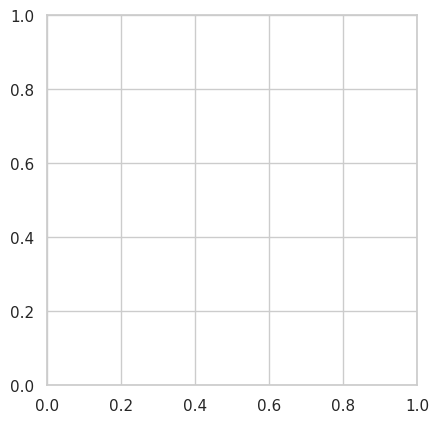

In [ ]:
# Confusion matrix

y_real = test_labels
y_pred = knn_predictions
labels = first_m_tags

cm = multilabel_confusion_matrix(y_real.argmax(axis=1), y_pred.argmax(axis=1))

#cm = confusion_matrix(
#    y_real.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("My confusion matrix")
plt.show()

### SVM

In [ ]:
%%time
svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(X_train_transformed, train_labels)

svm_preds = svm_clf.predict(X_test_transformed)
metrics_report("svm", test_labels, svm_preds, models_performance)

------svm Model Metrics-----
CPU times: user 10.4 s, sys: 1.65 s, total: 12.1 s
Wall time: 12min 28s


{'knn': {'Precision': 0.69,
  'Recall': 0.37,
  'F1': 0.46,
  'Haming loss': 0.03,
  'Jaccard score': 0.2},
 'svm': {'Precision': 0.78,
  'Recall': 0.54,
  'F1': 0.62,
  'Haming loss': 0.02,
  'Jaccard score': 0.31}}

### Random Forest

In [ ]:
%%time
rf_clf = OneVsRestClassifier(RandomForestClassifier(), n_jobs=-1)
rf_clf.fit(X_train_transformed, train_labels)
rf_preds = rf_clf.predict(X_test_transformed)
metrics_report("Random Forest", test_labels, rf_preds, models_performance)

------Random Forest Model Metrics-----
CPU times: user 33.9 s, sys: 4.56 s, total: 38.4 s
Wall time: 41min 6s


{'knn': {'Precision': 0.69,
  'Recall': 0.37,
  'F1': 0.46,
  'Haming loss': 0.03,
  'Jaccard score': 0.2},
 'svm': {'Precision': 0.78,
  'Recall': 0.54,
  'F1': 0.62,
  'Haming loss': 0.02,
  'Jaccard score': 0.31},
 'Random Forest': {'Precision': 0.84,
  'Recall': 0.22,
  'F1': 0.32,
  'Haming loss': 0.03,
  'Jaccard score': 0.12}}

### Gradient boosting

In [ ]:
%%time
gb_clf = OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=-1)
gb_clf.fit(X_train_transformed, train_labels)
gb_preds = gb_clf.predict(X_test_transformed)
metrics_report("Gradient Boosting", test_labels, gb_preds, models_performance)

### Résultats

In [ ]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

## Modélisation - Deep Learning

### Embedding
BERT <br/>
https://inside-machinelearning.com/bert-enfin-un-tutoriel-simple-et-rapide/

In [ ]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
#module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"

bert_layer = hub.KerasLayer(module_url, trainable=True)
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)

        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)

        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len

        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
import tokenization

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
input = bert_encode(df['df['Text_cleaned']'].text.values, tokenizer, max_len=100)
#test_input = bert_encode(test.text.values, tokenizer, max_len=100)
labels = df['Tags_cleaned'].label.values
#test_labels = test.label.values

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = build_model(bert_layer, max_len=100)

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)